<a href="https://colab.research.google.com/github/Shezan57/Machine-learning/blob/main/heart_disease_logreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing importent libreries

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [ ]:
# loading dataset
disease_df = pd.read_csv('framingham.csv')
disease_df.drop(['education'], inplace = True, axis = 1)
disease_df.rename(columns={'male':'sex_male'}, inplace = True)

In [ ]:
# removing NaN / Null values
disease_df.dropna(axis=0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())

   sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

In [ ]:
# data visualization
disease_df.describe()

,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.005599,0.311917,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.152493
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.074623,0.463338,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.359546
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# splitting the dataset into training testing data sets
X = np.asanyarray(disease_df[['age','sex_male','cigsPerDay','totChol','sysBP','glucose']])
y = np.asanyarray(disease_df['TenYearCHD'])

# normalization of the dataset

X = preprocessing.StandardScaler().fit(X).transform(X)

# Train and Test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 4)

print('Train set:',X_train.shape, y_train.shape)
print('Test set:',X_test.shape, y_test.shape)

Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


<ipython-input-10-03c4796867a4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df,palette='BuGn_r')


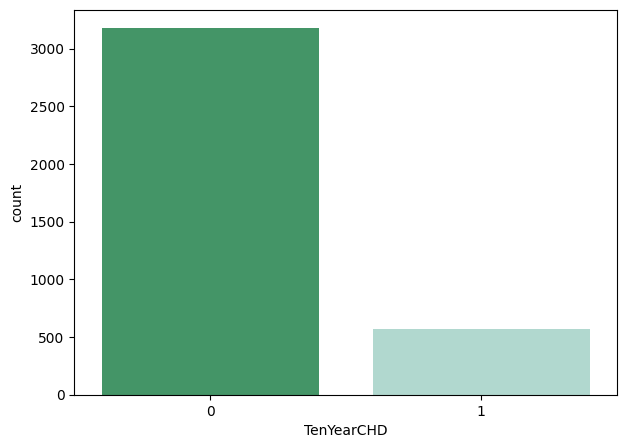

In [ ]:
# counting number of patients affected with  CHD
plt.figure(figsize=(7,5))
sns.countplot(x='TenYearCHD', data=disease_df,palette='BuGn_r')
plt.show()

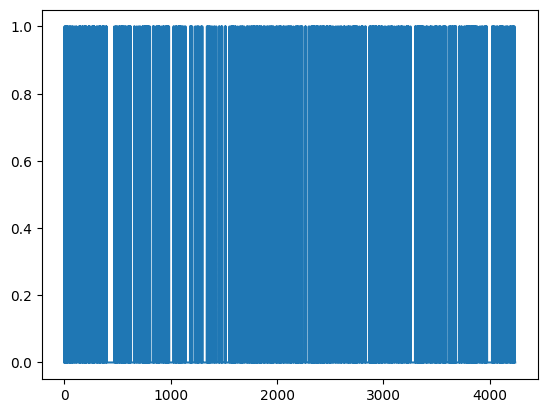

In [ ]:
# counting number of patients affected by CHD where 0 = Not affected and 1 = Affected
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)

Fitting Logistic Regression Model for Heart Disease Prediction

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

Evaluating Logistic Regression Model

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model is = ', accuracy_score(y_test, y_pred))

Accuracy of the model is =  0.8490230905861457


Confusion Matrix

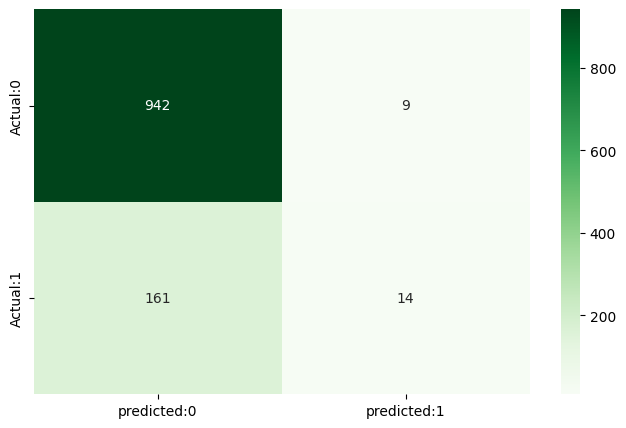

The details for confusion matrix is = 
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data = cm, columns = ['predicted:0','predicted:1'],
                           index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot = True, fmt ='d', cmap = 'Greens')
plt.show()
print('The details for confusion matrix is = ')
print(classification_report(y_test, y_pred))